In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

/var/folders/p7/w3v0h0sj79b__vhxymx1tvbw0000gn/T/ipykernel_39035/1152578926.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


/var/folders/p7/w3v0h0sj79b__vhxymx1tvbw0000gn/T/ipykernel_39035/3751158375.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')


121 121


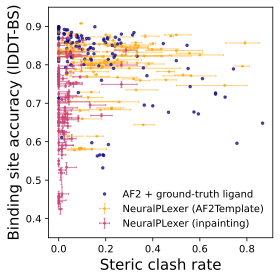

In [5]:
NUM_COLORS = 2
plt.rcParams['figure.dpi'] = 300
plt.style.use('seaborn-bright')
cm = plt.get_cmap('plasma')

import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.set_prop_cycle('color', [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

# Pre-computed metric csvs for individual samples, or replace by custom result paths
df = pd.read_csv("../neuralplexermodels_downstream_datasets_predictions/predictions/pdbbind_structure_recovery/af2template_baseline/PDBBind2019+bychain_AF2selected_benchmarking_summary.csv")
af2_ref = pd.read_csv("../neuralplexermodels_downstream_datasets_predictions/downstream_test_datasets/pdbbind_tasks/binding_site_recovery/af2_acc_stats.csv").set_index("sample_id")
lddt_af2 = []
clash_af2 = []
for _, row in df.iterrows():
    lddt_af2.append(af2_ref.loc[row["sample_id"], "lDDT-BS"])
    clash_af2.append(row["clash_af2"])


plt.errorbar(clash_af2, lddt_af2, label="AF2 + ground-truth ligand", markersize=5, ls='None', marker='.', alpha=0.7)
   
clash_ours = []
clash_ciu = []
clash_cil = []
lddt_ours = []
lddt_ciu = []
lddt_cil = []
for _, row in df.iterrows():
    clash_ours.append(np.median([row[f"clash_{i}"] for i in range(4)]))
    clash_ciu.append(np.quantile([row[f"clash_{i}"] for i in range(4)], 0.75) - np.median([row[f"clash_{i}"] for i in range(4)]))
    clash_cil.append(-np.quantile([row[f"clash_{i}"] for i in range(4)], 0.25) + np.median([row[f"clash_{i}"] for i in range(4)]))
    lddt_ours.append(np.median([row[f"lDDT-BS_{i}"] for i in range(4)]))
    lddt_ciu.append(np.quantile([row[f"lDDT-BS_{i}"] for i in range(4)], 0.75) - np.median([row[f"lDDT-BS_{i}"] for i in range(4)]))
    lddt_cil.append(-np.quantile([row[f"lDDT-BS_{i}"] for i in range(4)], 0.25) + np.median([row[f"lDDT-BS_{i}"] for i in range(4)]))
plt.errorbar(clash_ours, lddt_ours, yerr=(lddt_cil, lddt_ciu), xerr=(clash_cil, clash_ciu), elinewidth=1, capsize=1, label=r"NeuralPLexer (AF2Template)", markersize=4, ls='None', marker='.', alpha=0.5, color='orange')


df = pd.read_csv("../neuralplexermodels_downstream_datasets_predictions/predictions/pdbbind_structure_recovery/inpainting/PDBBind2019+bychain_AF2selected_benchmarking_summary.csv")
clash_ours = []
clash_ciu = []
clash_cil = []
lddt_ours = []
lddt_ciu = []
lddt_cil = []
for _, row in df.iterrows():
    clash_ours.append(np.median([row[f"clash_{i}"] for i in range(32)]))
    clash_ciu.append(np.quantile([row[f"clash_{i}"] for i in range(32)], 0.75) - np.median([row[f"clash_{i}"] for i in range(32)]))
    clash_cil.append(-np.quantile([row[f"clash_{i}"] for i in range(32)], 0.25) + np.median([row[f"clash_{i}"] for i in range(32)]))
    lddt_ours.append(np.median([row[f"lDDT-BS_{i}"] for i in range(32)]))
    lddt_ciu.append(np.quantile([row[f"lDDT-BS_{i}"] for i in range(32)], 0.75) - np.median([row[f"lDDT-BS_{i}"] for i in range(32)]))
    lddt_cil.append(-np.quantile([row[f"lDDT-BS_{i}"] for i in range(32)], 0.25) + np.median([row[f"lDDT-BS_{i}"] for i in range(32)]))
plt.errorbar(clash_ours, lddt_ours, yerr=(lddt_cil, lddt_ciu), xerr=(clash_cil, clash_ciu), elinewidth=1, capsize=1, label=r"NeuralPLexer (inpainting)", markersize=4, ls='None', marker='.', alpha=0.7)


print(len(lddt_ours), len(lddt_ciu))
plt.ylim(0.35, 0.95)
plt.ylabel("Binding site accuracy (lDDT-BS)", fontsize=15)
plt.xlabel("Steric clash rate", fontsize=15)
plt.legend(frameon=False)
#plt.xlim(-0.02, 1.0)
#plt.xscale('log')
plt.tight_layout()
plt.savefig("figures/fig3f.svg", format="svg",bbox_inches='tight')
plt.show()

/var/folders/p7/w3v0h0sj79b__vhxymx1tvbw0000gn/T/ipykernel_39035/355357743.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')


Success rate: [0.026962962962962963, 0.0468888888888889, 0.07214814814814814, 0.10022222222222224, 0.13881481481481484, 0.1651111111111111] std: [0.010962962962962963, 0.013700900614215243, 0.01548909966734029, 0.01530503740916767, 0.013921985258050567, 0.012229851715236795]
Success rate: [0.20438016528925623, 0.25107438016528927, 0.288595041322314, 0.32049586776859507, 0.3420661157024793, 0.35545454545454563] std: [0.019341491660107367, 0.019514635076612337, 0.01712479655924551, 0.013955934828305252, 0.012140324276279797, 0.008862263662994316]
Success rate: [0.04311111111111112, 0.07577777777777778, 0.11414814814814812, 0.1631111111111111, 0.21022222222222223, 0.2565925925925926] std: [0.013793698487708858, 0.016983975340930768, 0.017056188913321568, 0.02066069208741237, 0.019870085600803652, 0.015163308541539541]
Success rate: [0.3040495867768595, 0.3524793388429752, 0.3885123966942149, 0.41570247933884297, 0.43644628099173555, 0.4454545454545453] std: [0.021144592163184928, 0.017311

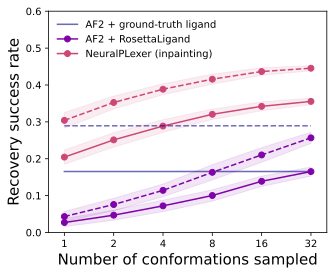

In [6]:
import random
import tqdm
plt.rcParams['figure.dpi'] = 300
plt.style.use('seaborn-bright')


cm = plt.get_cmap('plasma')

def compute_hitrate(df, Nms, THRESHOLD1, THRESHOLD2, THRESHOLD3, N_max):
    hits = []
    for nmax in Nms:
        samp_hits = []
        for trial in range(n_trial):
            for _, row in df.iterrows():
                rs = [(row[f"lDDT-BS_{i}"]>THRESHOLD1) & (row[f"clash_{i}"]<THRESHOLD2) & (row[f"lig_rmsd_{i}"]<THRESHOLD3) for i in range(N_max)]
                rs = random.choices(rs, k=nmax)  # with replacement
                samp_hits.append(max(rs))
    
        hits.append(np.sum(np.array(samp_hits)) / len(samp_hits))
    return hits

def compute_hitrate(df, Nms, THRESHOLD1, THRESHOLD2, THRESHOLD3, N_max):
    hits, hits_std = [], []
    for nmax in Nms:
        hits_trial, hit_std_trial = [], []
        for trial in range(n_trial):
            samp_hits = []
            for _, row in df.iterrows():
                rs = [(row[f"lDDT-BS_{i}"]>THRESHOLD1) & (row[f"clash_{i}"]<THRESHOLD2) & (row[f"lig_rmsd_{i}"]<THRESHOLD3) for i in range(N_max)]
                rs = random.choices(rs, k=nmax)  # with replacement
                samp_hits.append(max(rs))
    
            hits_trial.append(np.mean(np.array(samp_hits)))
        hits.append(np.mean(hits_trial))
        hits_std.append(np.std(hits_trial))
    print("Success rate:", hits, "std:", hits_std)
    return np.array(hits), np.array(hits_std)


n_trial = 100

Nms = [1, 2, 4, 8, 16, 32]
Nms1 = [1, 2, 4, 8]
Nms2 = [1, 2, 4, 8, 16]

af2_ref = pd.read_csv("../neuralplexermodels_downstream_datasets_predictions/downstream_test_datasets/pdbbind_tasks/binding_site_recovery/af2_acc_stats.csv").set_index("sample_id")


def compute_af2_hitrate(df, Nms, THRESHOLD1, THRESHOLD2, N_max):
    hits = []
    for nmax in Nms:
        samp_hits = []
        for trial in range(n_trial):
            for _, row in df.iterrows():
                rs = [(af2_ref.loc[row["sample_id"], "lDDT-BS"]>THRESHOLD1)&(row[f"clash_af2"]<THRESHOLD2) for i in range(N_max)]
                rs = random.choices(rs, k=nmax)  # with replacement
                samp_hits.append(max(rs))
    
        hits.append(np.sum(np.array(samp_hits)) / len(samp_hits))
    return hits

dfs = {
    "../baselines/rosettaligand/benchmarking_summary_033023.csv": "AF2 + RosettaLigand",
    "../neuralplexermodels_downstream_datasets_predictions/predictions/pdbbind_structure_recovery/inpainting/PDBBind2019+bychain_AF2selected_benchmarking_summary.csv": "NeuralPLexer (inpainting)",
}

NUM_COLORS = 4

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
ax.set_prop_cycle('color', [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
    

THRESHOLD1 = 0.7
THRESHOLD2 = 0.001
THRESHOLD3 = 2.0


plt.plot(Nms, compute_af2_hitrate(df, Nms, THRESHOLD1, THRESHOLD2, max(Nms)), '-', label="AF2 + ground-truth ligand", alpha=0.6)
for name, label in dfs.items():
    df = pd.read_csv(name)
    y, yerr = compute_hitrate(df, Nms, THRESHOLD1, THRESHOLD2, THRESHOLD3, max(Nms))
    line, = plt.plot(Nms, y, '-o', label=label)
    plt.fill_between(Nms, y - yerr, y + yerr, color=line.get_color(), alpha=0.1)
    
plt.plot([], [])
plt.legend(frameon=False, loc="upper left")    

THRESHOLD1 = 0.5
THRESHOLD2 = 0.05
THRESHOLD3 = 2.5


plt.plot(Nms, compute_af2_hitrate(df, Nms, THRESHOLD1, THRESHOLD2, max(Nms)), '--', label="AF2 + ground-truth ligand", alpha=0.6)
for name, label in dfs.items():
    df = pd.read_csv(name)
    y, yerr = compute_hitrate(df, Nms, THRESHOLD1, THRESHOLD2, THRESHOLD3, max(Nms))
    line, = plt.plot(Nms, y, '--o', label=label)
    plt.fill_between(Nms, y - yerr, y + yerr, color=line.get_color(), alpha=0.1)
    
plt.xlabel(r"Number of conformations sampled", fontsize=15)
plt.xscale('log', base=2)
plt.xlim(0.8, 40)
plt.ylim(0.0, 0.6)
plt.xticks(Nms, Nms)
plt.ylabel(r"Recovery success rate", fontsize=15)
plt.savefig("figures/fig3g.svg", format="svg",bbox_inches='tight')
plt.show()